# cygnus-threshold-sweep

Sweep Cygnus width Q-value threshold at 3200 MT/s and 200 MT/s.

10/31/2023

In [ ]:
from collections import defaultdict
from importlib import reload
import json
import os
import sys
from typing import Dict, List, Optional

from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot

# Configuration

In [ ]:
sim_dir = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
bandwidths = [200, 3200]
weights_path = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    #"gap",
    #"cloudsuite",
]
dpi = 192

In [3]:
reload(collate)
studies = {}
for bandwidth in bandwidths:
    print(f"\n=== {bandwidth} MT/s ===")
    core_str = f"default_{bandwidth}"
    core_dir = os.path.join(sim_dir, core_str)

    # Threshold sweep
    print(f"~~~ {os.path.join(core_dir, 'cygnus_qvthreshold')} ~~~")
    studies[f"cygnus_qvthreshold__{bandwidth}"] = collate.StudyCollator(
        core_dir, "cygnus_qvthreshold",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )

    # Baselines
    print(f"~~~ {os.path.join(core_dir, 'prefetchers')} ~~~")
    studies[f"prefetchers__{bandwidth}"] = collate.StudyCollator(
        core_dir, "prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["spp_ppf", "pythia", "my5"],
    )


=== 200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/cygnus_qvthreshold ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2345/2345 [00:27<00:00, 86.05file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 24 benchmarks over 35 experiments:
    Benchmarks : 619.lbm 620.omnetpp leslie3d omnetpp milc 607.cactuBSSN 602.gcc 623.xalancbmk zeusmp soplex mcf lbm 628.pop2 libquantum 649.fotonik3d 627.cam4 xalancbmk cactusADM sphinx3 605.mcf astar GemsFDTD bwaves gcc
    Experiments: cygnus__-5 cygnus__-1 cygnus__18 cygnus__0 cygnus__9 cygnus__-12 cygnus__-7 cygnus__8 cygnus__17 cygnus__-10 cygnus__5 cygnus__7 cygnus__-14 cygnus__1 cygnus__-4 cygnus__-11 cygnus__12 cygnus__13 cygnus__14 cygnus__-13 cygnus__-8 cygnus__-9 cygnus__16 cygnus__2 cygnus__20 cygnus__4 cygnus__15 cygnus__6 cygnus__11 cygnus__-6 cygnus__-2 cygnus__10 cygnus__-3 cygnus__3 cygnus__19
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 840/840 [00:05<00:00, 152.09it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 3 suites over 35 experiments:
    Suites     : spec06 all spec17
    Experiments: cygnus__-5 cygnus__-1 cygnus__18 cygnus__0 cygnus__9 cygnus__-12 cygnus__-7 cygnus__8 cygnus__17 cygnus__-10 cygnus__5 cygnus__7 cygnus__-14 cygnus__1 cygnus__-4 cygnus__-11 cygnus__12 cygnus__13 cygnus__14 cygnus__-13 cygnus__-8 cygnus__-9 cygnus__16 cygnus__2 cygnus__20 cygnus__4 cygnus__15 cygnus__6 cygnus__11 cygnus__-6 cygnus__-2 cygnus__10 cygnus__-3 cygnus__3 cygnus__19
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 105/105 [00:04<00:00, 22.90it/s]


~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1129/1129 [00:09<00:00, 123.98file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 110 benchmarks over 3 experiments:
    Benchmarks : Components-Shortcut pr__belgium_osm.mtx bfs__dblp-2010.mtx leslie3d 607.cactuBSSN bfs__netherlands_osm.mtx nutch bc__com-Youtube.mtx pr__wikipedia-20060925.mtx cc__sx-stackoverflow.mtx pr__dblp-2010.mtx pr__cnr-2000.mtx bc__dblp-2010.mtx bfs__coPapersCiteseer.mtx cc__coPapersCiteseer.mtx cc__soc-LiveJournal1.mtx bc__cnr-2000.mtx BellmanFord Radii Components bfs__sx-stackoverflow.mtx cc__netherlands_osm.mtx canneal GemsFDTD MIS bc bc__netherlands_osm.mtx bwaves cassandra bc__sx-stackoverflow.mtx CF BFSCC omnetpp bc__wikipedia-20060925.mtx classifcation zeusmp cc__amazon0601.mtx soplex pr__com-Youtube.mtx bc__web-Google.mtx raytrace 628.pop2 pr__netherlands_osm.mtx cc__dblp-2010.mtx bfs__belgium_osm.mtx bfs pr__sx-stackoverflow.mtx xalancbmk facesim bc__luxembourg_osm.mtx pr__luxembourg_osm.mtx sphinx3 whiskey 605.mcf astar sssp gcc cc__wikipedia-20060925.mtx bfs__in-2004.mt

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 330/330 [00:02<00:00, 119.06it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 9 suites over 3 experiments:
    Suites     : parsec gap spec06 google ligra cloudsuite all gap_real spec17
    Experiments: my5 spp_ppf pythia
        


[ipykernel_launcher][angrist-3] Generating suite stats:  48%|████▊     | 13/27 [00:01<00:01,  9.51it/s]

[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'cc__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__in-2004.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__amazon-2008.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'cc__amazon-2008.mtx') in suite "all" because it is missing results


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 27/27 [00:02<00:00, 10.06it/s]



=== 3200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/cygnus_qvthreshold ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2345/2345 [00:28<00:00, 82.65file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 24 benchmarks over 35 experiments:
    Benchmarks : 619.lbm 620.omnetpp leslie3d omnetpp milc 607.cactuBSSN 602.gcc 623.xalancbmk zeusmp soplex mcf lbm 628.pop2 libquantum 649.fotonik3d 627.cam4 xalancbmk cactusADM sphinx3 605.mcf astar GemsFDTD bwaves gcc
    Experiments: cygnus__-5 cygnus__-1 cygnus__18 cygnus__0 cygnus__9 cygnus__-12 cygnus__-7 cygnus__8 cygnus__17 cygnus__-10 cygnus__5 cygnus__7 cygnus__-14 cygnus__1 cygnus__-4 cygnus__-11 cygnus__12 cygnus__13 cygnus__14 cygnus__-13 cygnus__-8 cygnus__-9 cygnus__16 cygnus__2 cygnus__20 cygnus__4 cygnus__15 cygnus__6 cygnus__11 cygnus__-6 cygnus__-2 cygnus__10 cygnus__-3 cygnus__3 cygnus__19
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 840/840 [00:05<00:00, 157.30it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 3 suites over 35 experiments:
    Suites     : spec06 all spec17
    Experiments: cygnus__-5 cygnus__-1 cygnus__18 cygnus__0 cygnus__9 cygnus__-12 cygnus__-7 cygnus__8 cygnus__17 cygnus__-10 cygnus__5 cygnus__7 cygnus__-14 cygnus__1 cygnus__-4 cygnus__-11 cygnus__12 cygnus__13 cygnus__14 cygnus__-13 cygnus__-8 cygnus__-9 cygnus__16 cygnus__2 cygnus__20 cygnus__4 cygnus__15 cygnus__6 cygnus__11 cygnus__-6 cygnus__-2 cygnus__10 cygnus__-3 cygnus__3 cygnus__19
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 105/105 [00:04<00:00, 23.69it/s]


~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1129/1129 [00:09<00:00, 123.04file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 110 benchmarks over 3 experiments:
    Benchmarks : Components-Shortcut pr__belgium_osm.mtx bfs__dblp-2010.mtx leslie3d 607.cactuBSSN bfs__netherlands_osm.mtx nutch bc__com-Youtube.mtx pr__wikipedia-20060925.mtx cc__sx-stackoverflow.mtx pr__dblp-2010.mtx pr__cnr-2000.mtx bc__dblp-2010.mtx bfs__coPapersCiteseer.mtx cc__coPapersCiteseer.mtx cc__soc-LiveJournal1.mtx bc__cnr-2000.mtx BellmanFord Radii Components bfs__sx-stackoverflow.mtx cc__netherlands_osm.mtx canneal GemsFDTD MIS bc bc__netherlands_osm.mtx bwaves cassandra bc__sx-stackoverflow.mtx CF BFSCC omnetpp bc__wikipedia-20060925.mtx classifcation zeusmp cc__amazon0601.mtx soplex pr__com-Youtube.mtx bc__web-Google.mtx raytrace 628.pop2 pr__netherlands_osm.mtx cc__dblp-2010.mtx bfs__belgium_osm.mtx bfs pr__sx-stackoverflow.mtx xalancbmk facesim bc__luxembourg_osm.mtx pr__luxembourg_osm.mtx sphinx3 whiskey 605.mcf astar sssp gcc cc__wikipedia-20060925.mtx bfs__in-2004.mt

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 330/330 [00:02<00:00, 119.98it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 9 suites over 3 experiments:
    Suites     : parsec gap spec06 google ligra cloudsuite all gap_real spec17
    Experiments: my5 spp_ppf pythia
        


[ipykernel_launcher][angrist-3] Generating suite stats:  52%|█████▏    | 14/27 [00:01<00:01, 12.67it/s]

[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'cc__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__in-2004.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__amazon-2008.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'cc__amazon-2008.mtx') in suite "all" because it is missing results


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 27/27 [00:02<00:00, 10.05it/s]


# Helper functions

In [26]:
def table_threshold_sweep_suite(data: Dict[int, dict],
                                statistic_name: str = "cpu.gmean.ipc_improvement",
                                suites: Optional[List[str]] = None,
                                add_mean: bool = False):
    table = plot.get_suite_table(data, statistic_name,
                                suites=suites, add_mean=add_mean)
    return table

def table_threshold_sweep_benchmark(data: Dict[int, dict],
                                    suite: str,
                                    benchmarks: Optional[List[str]] = None,
                                    statistic_name: str = "cpu.gmean.ipc_improvement",
                                    add_mean: bool = False):
    table = plot.get_benchmark_table(data, suite, statistic_name,
                                     add_mean=add_mean)
    if benchmarks is not None:
        table = table[benchmarks]
    return table

def plot_threshold_table(table: pd.DataFrame,
                         ymin: Optional[float] = None,
                         ymax: Optional[float] = None,
                         colors: Optional[dict] = defaultdict(lambda: None),
                         markers: Optional[dict] = defaultdict(lambda: "o"),
                         legend_kwargs: Optional[dict] = {},
                         suptitle: Optional[str] = None,
                         ylabel: Optional[str] = None):
    # Plot
    fig, ax = plt.subplots(figsize=(5, 3), dpi=dpi)

    for col in table.columns:
        X = table.index.to_numpy(dtype=np.float32)
        y = table[col].to_numpy(dtype=np.float32)
        
        ax.plot(X, y, label=col, marker='.', markersize=5)

    ax.grid(axis='both', color='lightgray')
    # ax.set_ylim(ymin=ymin, ymax=ymax)
    #ax.set_xticks(range(len(data.keys())))
    #ax.set_xticklabels(data.keys())
    ax.set_ylim(ymin=ymin, ymax=ymax)

    # ax.xaxis.set_tick_params(labelsize=7.5)
    # ax.yaxis.set_tick_params(labelsize=7.5)

    ax.set_xlabel("Q-value threshold", fontsize=7.5)
    ax.set_ylabel(ylabel, fontsize=7.5)
    
    ax.set_title(suptitle)#, fontsize=7.5)
    fig.legend(**legend_kwargs)
    fig.tight_layout()

def plot_threshold_sweep(data: Dict[int, dict],
                         statistic_name: str = "cpu.gmean.ipc_improvement",
                         suites: Optional[List[str]] = None,
                         **kwargs):
    # Get statistics
    table = table_threshold_sweep_suite(data, 
                                        statistic_name=statistic_name,
                                        suites=suites, 
                                        add_mean=True)
    plot_threshold_table(table, **kwargs)

def plot_threshold_sweep_benchmarks(data: Dict[int, dict],
                                    statistic_name: str = "cpu.gmean.ipc_improvement",
                                    suite: str = "spec06",
                                    benchmarks: Optional[List[str]] = None,
                                    **kwargs):

    # Get statistics
    table = table_threshold_sweep_benchmark(data, suite,
                                            benchmarks=benchmarks,
                                            statistic_name=statistic_name,
                                            add_mean=False)
    plot_threshold_table(table, **kwargs)

# Threshold sweep tables

In [6]:
degreedyn_1core_dfs = {}
for bandwidth in bandwidths:
    degreedyn_1core_dfs[bandwidth] = {}
    thresholds = [int(exp.split("_")[-1]) for exp in studies[f"cygnus_qvthreshold__{bandwidth}"].study.experiments]
    degreedyn_1core_dfs[bandwidth] = {
        threshold: studies[f"cygnus_qvthreshold__{bandwidth}"][f"cygnus__{threshold}"] for threshold in thresholds
    }

degreedyn_1core_legend_kwargs = {
    "ncol": 6,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}

## 3200 MT/s

### IPC improvement

In [22]:
table_threshold_sweep_suite(degreedyn_1core_dfs[3200], suites=suites)

,spec06,spec17,gmean
-14,27.98,14.97,21.300703
-13,27.97,14.97,21.295964
-12,27.99,14.97,21.305442
-11,27.99,15.00,21.321268
-10,27.88,15.22,21.385063
-9,28.37,16.25,22.159783
-8,30.52,19.52,24.898961
-7,32.13,22.43,27.187562
-6,32.75,23.55,28.067414
-5,33.34,24.47,28.828684


#### spec06

In [17]:
table_threshold_sweep_benchmark(
    degreedyn_1core_dfs[3200], suite="spec06", 
    #benchmarks=["GemsFDTD", "astar", "bwaves", "cactusADM", "gcc", "lbm", "leslie3d", "libquantum"]
    #benchmarks=["mcf", "milc", "omnetpp", "soplex", "sphinx3", "xalancbmk", "zeusmp"]
)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
-14,67.51,-2.07,38.01,57.15,32.59,50.51,29.23,66.09,12.91,-17.78,-4.40,38.18,59.01,5.66,28.88,27.979339
-13,67.51,-2.07,38.01,57.15,32.59,50.51,29.23,66.09,12.81,-17.78,-4.40,38.18,59.01,5.66,28.88,27.971779
-12,67.51,-2.07,38.01,57.15,32.59,50.51,29.23,66.09,12.91,-17.78,-4.34,38.18,59.01,5.66,28.88,27.984692
-11,67.54,-1.95,37.96,57.09,32.59,50.51,29.21,66.09,12.90,-17.76,-4.12,38.18,59.01,5.64,28.67,27.994389
-10,67.59,-1.27,38.01,57.04,32.59,50.51,29.56,66.09,14.07,-17.75,-3.88,38.12,58.99,5.64,24.19,27.882586
-9,67.78,0.47,38.03,56.87,32.62,50.51,29.93,66.09,19.29,-17.72,-1.04,38.53,59.00,6.13,18.70,28.372996
-8,70.23,4.98,39.11,59.87,32.68,50.46,30.04,66.09,22.39,-11.21,2.75,39.39,59.50,7.26,19.06,30.516930
-7,73.00,8.25,40.59,62.29,32.78,50.50,30.44,66.08,17.58,-3.09,6.81,40.66,59.72,8.72,18.81,32.132075
-6,74.57,7.10,40.79,63.83,32.81,50.51,30.48,66.07,13.95,1.66,10.10,41.56,59.94,9.56,18.58,32.751029
-5,75.76,6.77,41.17,65.23,32.78,50.49,30.52,66.01,12.65,4.95,12.58,42.16,60.28,10.20,18.27,33.342728


#### spec17

In [ ]:
table_threshold_sweep_benchmark(degreedyn_1core_dfs[3200], suite="spec17")

## 200 MT/s

### IPC improvement

In [ ]:
table_threshold_sweep_suite(degreedyn_1core_dfs[200], suites=suites)

#### spec06

In [ ]:
table_threshold_sweep_benchmark(degreedyn_1core_dfs[200], suite="spec06")

#### spec17

In [ ]:
table_threshold_sweep_benchmark(degreedyn_1core_dfs[200], suite="spec17")

# Threshold sweep plots

## 3200 MT/s

### IPC improvement

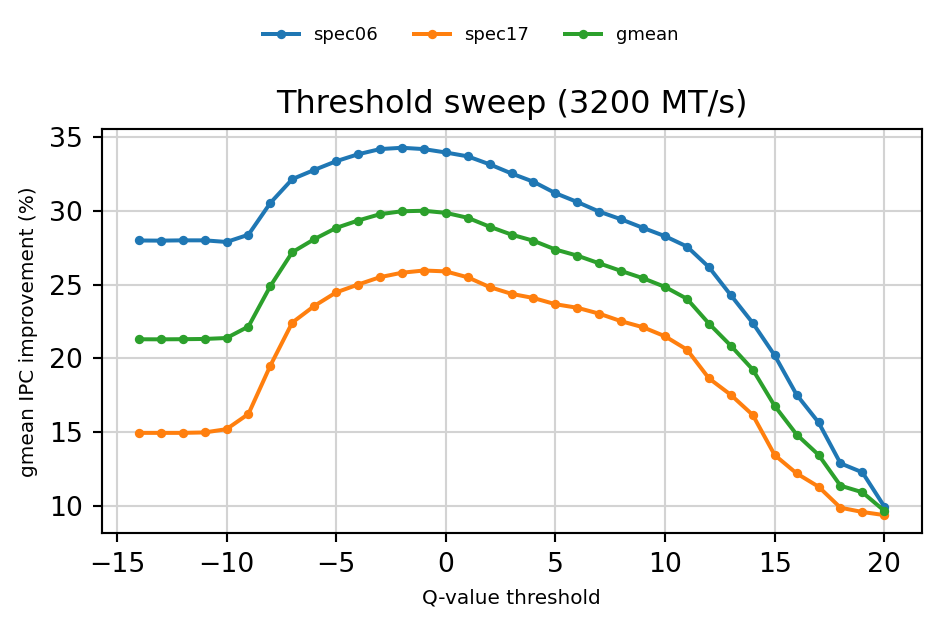

In [27]:
plot_threshold_sweep(
    degreedyn_1core_dfs[3200], 
    suites=suites, 
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (3200 MT/s)",
    #ymin=0,
)
plt.savefig("threshold_sweep_3200_ipc.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_ipc.png", dpi=dpi, bbox_inches="tight")

#### spec06

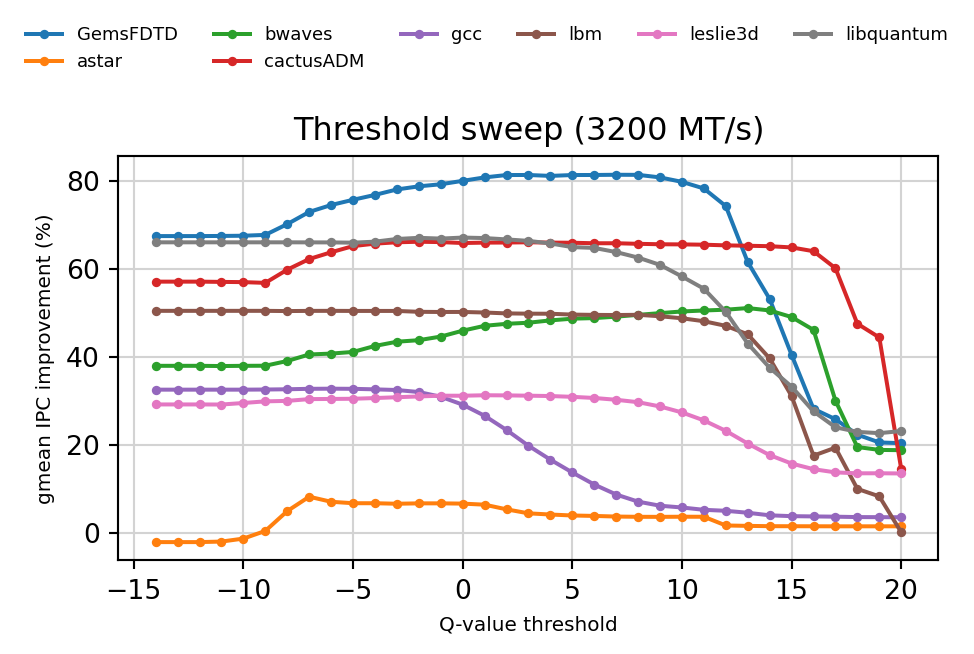

In [30]:
plot_threshold_sweep_benchmarks(
    degreedyn_1core_dfs[3200], 
    suite="spec06",
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (3200 MT/s)",
    benchmarks=["GemsFDTD", "astar", "bwaves", "cactusADM", "gcc", "lbm", "leslie3d", "libquantum"],
)
plt.savefig("threshold_sweep_3200_ipc_spec06.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_ipc_spec06.png", dpi=dpi, bbox_inches="tight")

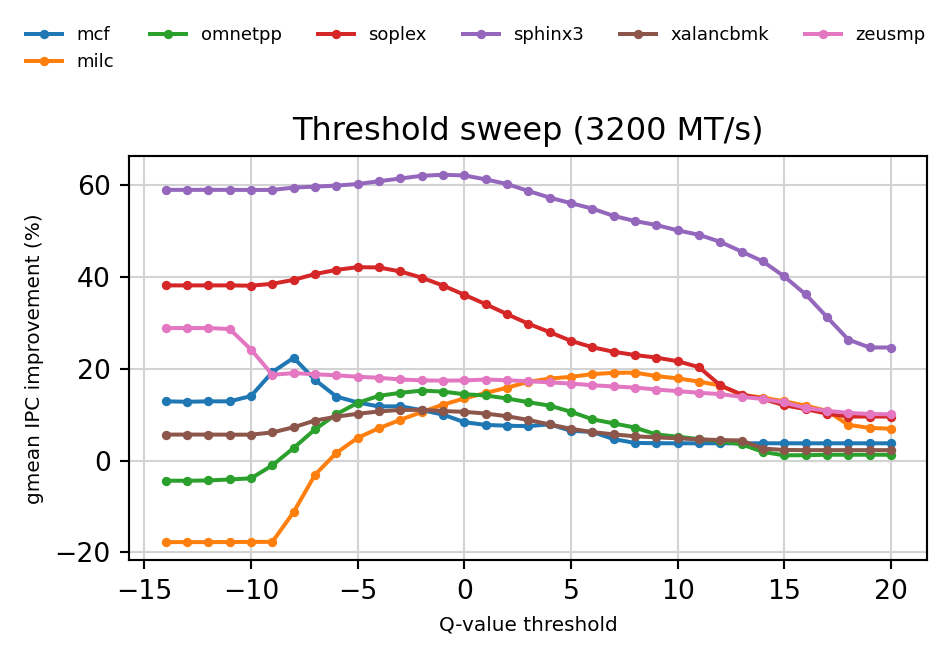

In [29]:
plot_threshold_sweep_benchmarks(
    degreedyn_1core_dfs[3200], 
    suite="spec06",
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (3200 MT/s)",
    benchmarks=["mcf", "milc", "omnetpp", "soplex", "sphinx3", "xalancbmk", "zeusmp"],
)
plt.savefig("threshold_sweep_3200_ipc_spec06_pt2.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_ipc_spec06_pt2.png", dpi=dpi, bbox_inches="tight")

#### spec17

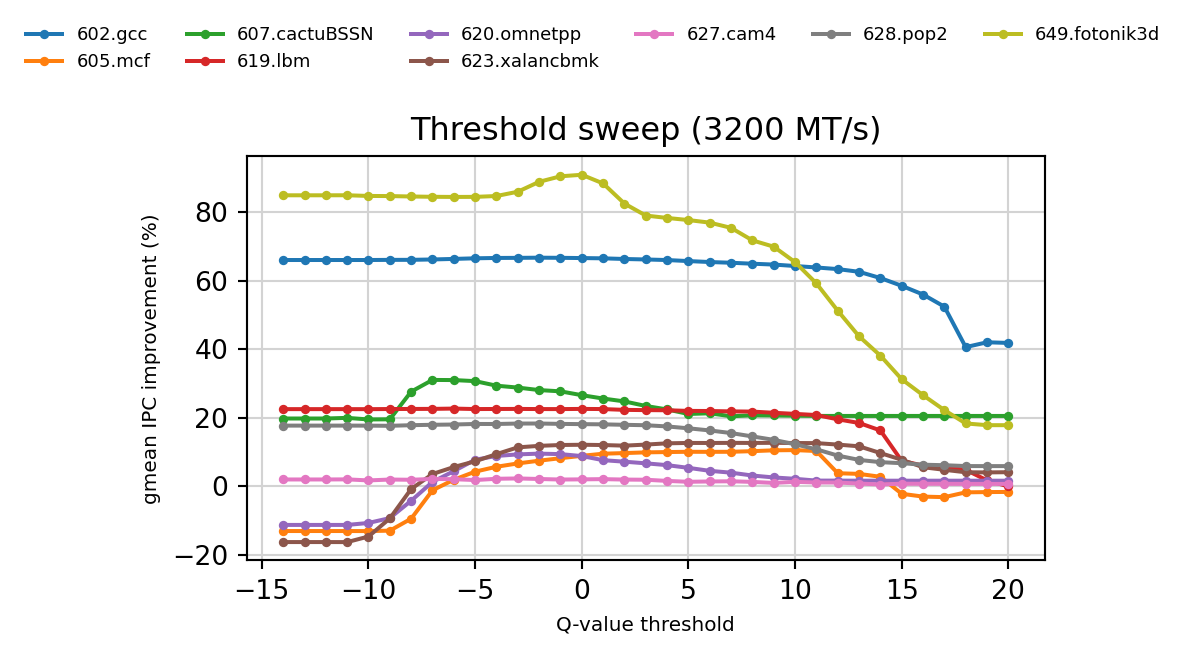

In [31]:
plot_threshold_sweep_benchmarks(
    degreedyn_1core_dfs[3200], 
    suite="spec17",
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (3200 MT/s)",
)
plt.savefig("threshold_sweep_3200_ipc_spec17.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_ipc_spec17.png", dpi=dpi, bbox_inches="tight")

### Coverage

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[3200], 
    suites=suites,
    statistic_name="cache.L2C.amean.prefetch_coverage",
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="Prefetch coverage (%)",
    suptitle="Threshold sweep (3200 MT/s)",
    ymin=0,
)
plt.savefig("threshold_sweep_3200_coverage.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_coverage.png", dpi=dpi, bbox_inches="tight")

### Untimely coverage

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[3200], 
    suites=suites,
    statistic_name="cache.L2C.amean.prefetch_coverage_untimely",
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="Prefetch coverage + untimely (%)",
    suptitle="Threshold sweep (3200 MT/s)",
    ymin=0,
)
plt.savefig("threshold_sweep_3200_coverage_untimely.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_coverage_untimely.png", dpi=dpi, bbox_inches="tight")

### Overpredictions

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[3200], 
    suites=suites,
    statistic_name="cache.L2C.amean.prefetch_overpredictions",
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="Prefetch overpredictions (%)",
    suptitle="Threshold sweep (3200 MT/s)",
    ymin=0, ymax=100,
)
plt.savefig("threshold_sweep_3200_overpredictions.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_overpredictions.png", dpi=dpi, bbox_inches="tight")

## 200 MT/s

### IPC improvement

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[200], 
    suites=suites, 
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (200 MT/s)",
    #ymin=0,
)
plt.savefig("threshold_sweep_200_ipc.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_ipc.png", dpi=dpi, bbox_inches="tight")

#### spec06

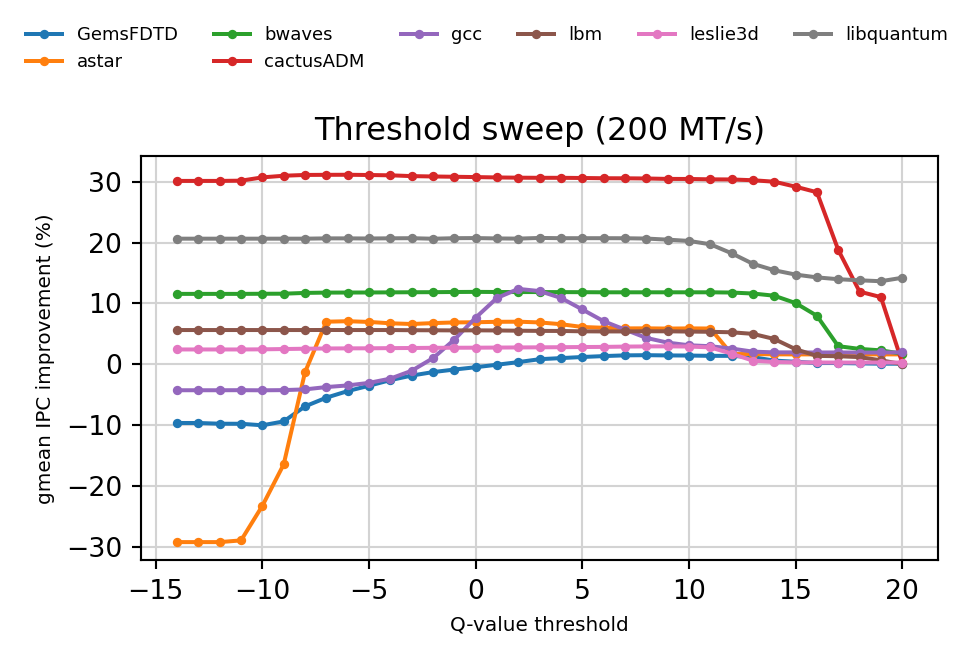

In [35]:
plot_threshold_sweep_benchmarks(
    degreedyn_1core_dfs[200], 
    suite="spec06",
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (200 MT/s)",
    benchmarks=["GemsFDTD", "astar", "bwaves", "cactusADM", "gcc", "lbm", "leslie3d", "libquantum"],
)
plt.savefig("threshold_sweep_200_ipc_spec06.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_ipc_spec06.png", dpi=dpi, bbox_inches="tight")

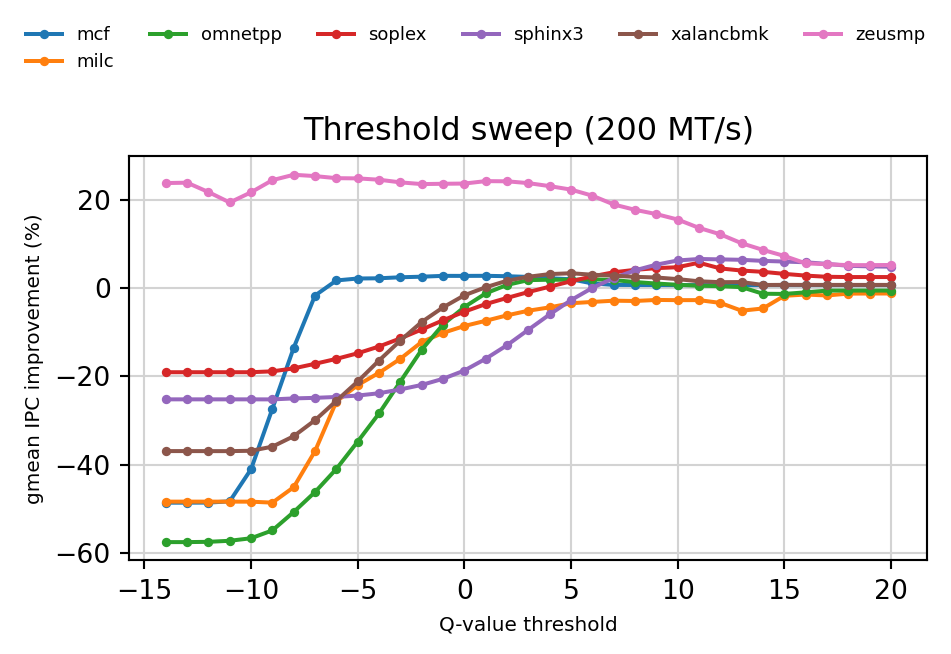

In [36]:
plot_threshold_sweep_benchmarks(
    degreedyn_1core_dfs[200], 
    suite="spec06",
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (200 MT/s)",
    benchmarks=["mcf", "milc", "omnetpp", "soplex", "sphinx3", "xalancbmk", "zeusmp"],
)
plt.savefig("threshold_sweep_200_ipc_spec06_pt2.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_ipc_spec06_pt2.png", dpi=dpi, bbox_inches="tight")

#### spec17

In [ ]:
plot_threshold_sweep_benchmarks(
    degreedyn_1core_dfs[200], 
    suite="spec17",
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="gmean IPC improvement (%)",
    suptitle="Threshold sweep (200 MT/s)",
)
plt.savefig("threshold_sweep_200_ipc_spec17.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_ipc_spec17.png", dpi=dpi, bbox_inches="tight")

### Coverage

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[200], 
    suites=suites,
    statistic_name="cache.L2C.amean.prefetch_coverage",
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="Prefetch coverage (%)",
    suptitle="Threshold sweep (200 MT/s)",
    ymin=0,
)
plt.savefig("threshold_sweep_200_coverage.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_coverage.png", dpi=dpi, bbox_inches="tight")

### Untimely coverage

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[200], 
    suites=suites,
    statistic_name="cache.L2C.amean.prefetch_coverage_untimely",
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="Prefetch coverage + untimely (%)",
    suptitle="Threshold sweep (200 MT/s)",
    ymin=0,
)
plt.savefig("threshold_sweep_200_coverage_untimely.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_coverage_untimely.png", dpi=dpi, bbox_inches="tight")

### Overpredictions

In [ ]:
plot_threshold_sweep(
    degreedyn_1core_dfs[200], 
    suites=suites,
    statistic_name="cache.L2C.amean.prefetch_overpredictions",
    #colors=degreedyn_1core_colors, 
    #markers=degreedyn_1core_markers,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    ylabel="Prefetch overpredictions (%)",
    suptitle="Threshold sweep (200 MT/s)",
    ymin=0, ymax=100,
)
plt.savefig("threshold_sweep_200_overpredictions.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_overpredictions.png", dpi=dpi, bbox_inches="tight")

# Baseline comparison

In [ ]:
baseline_df_3200 = {
    "Cygnus orig_thresh (-3)": studies[f"cygnus_qvthreshold__3200"][f"cygnus__-3"],
    "Cygnus best_thresh (-1)": studies[f"cygnus_qvthreshold__3200"][f"cygnus__-1"],
    "SPP+PPF": studies[f"prefetchers__3200"][f"spp_ppf"],
    "Pythia": studies[f"prefetchers__3200"][f"pythia"],
    "my5": studies[f"prefetchers__3200"][f"my5"],
}
baseline_df_200 = {
    "Cygnus orig_thresh (-3)": studies[f"cygnus_qvthreshold__200"][f"cygnus__-3"],
    "Cygnus best_thresh (+7)": studies[f"cygnus_qvthreshold__200"][f"cygnus__7"],
    "SPP+PPF": studies[f"prefetchers__200"][f"spp_ppf"],
    "Pythia": studies[f"prefetchers__200"][f"pythia"],
    "my5": studies[f"prefetchers__200"][f"my5"],
}

baseline_colors = {
    "Cygnus orig_thresh (-3)": colormaps["Set3"](0),
    "Cygnus best_thresh (-1)": colormaps["Set3"](0),
    "Cygnus best_thresh (+7)": colormaps["Set3"](0),
    "my5"    : colormaps["Set3"](9),
    "Pythia" : colormaps["Set3"](2),
    "SPP+PPF": colormaps["Set3"](6),
}
baseline_hatches = {
    "Cygnus orig_thresh (-3)": "",
    "Cygnus best_thresh (-1)": "////",
    "Cygnus best_thresh (+7)": "////",
    "my5"    : "",
    "Pythia" : "",
    "SPP+PPF": "",
}
baseline_legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
baseline_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

## 3200 MT/s

### IPC improvement

In [ ]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 45),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("threshold_sweep_3200_baseline_ipc.png", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_baseline_ipc.pdf", dpi=dpi, bbox_inches="tight")

### Prefetch classification

In [ ]:
reload(plot)
plot.plot_suite_overpredictions(
    baseline_df_3200,
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    suptitle="Prefetch classification (3200 MT/s)",
    add_suptitle=True,
    add_xlabel=False,
    ylim=(0, 200),
    ytick_distance=20,
    dpi=192, figsize=(5, 3))
plt.savefig("threshold_sweep_3200_baseline_classification.png", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_3200_baseline_classification.pdf", dpi=dpi, bbox_inches="tight")

## 200 MT/s

### IPC improvement

In [ ]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-2, 20),
    ytick_distance=2,
    dpi=192, figsize=(5, 2.7))
plt.savefig("threshold_sweep_200_baseline_ipc.png", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_baseline_ipc.pdf", dpi=dpi, bbox_inches="tight")

### Prefetch classification

In [ ]:
reload(plot)
plot.plot_suite_overpredictions(
    baseline_df_3200,
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    suptitle="Prefetch classification (200 MT/s)",
    add_suptitle=True,
    add_xlabel=False,
    ylim=(0, 200),
    ytick_distance=20,
    dpi=192, figsize=(5, 3))
plt.savefig("threshold_sweep_200_baseline_classification.png", dpi=dpi, bbox_inches="tight")
plt.savefig("threshold_sweep_200_baseline_classification.pdf", dpi=dpi, bbox_inches="tight")